In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
medical_df = pd.read_csv('medical.csv')
non_smoker_df =medical_df[medical_df.smoker=='no']
ages =medical_df.age
charges=medical_df.charges


In [3]:
def estimate_charges(age,w,b):
    return w*age+b
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
def try_params(w,b,smoker):
    if smoker=='yes':
        ages= smoker_df.age
        target = smoker_df.charges
    elif smoker=='no':
        ages=non_smoker_df.age
        target = non_smoker_df.charges
    elif smoker==1:
        ages = medical_df.age
        target =medical_df.charges
    plt.title('Age vs Estimated Charge');
    
    x = estimate_charges(ages,w,b)
    plt.plot(ages,x);
    plt.scatter(ages,target,s=8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);
    loss = rmse(target, x)
    print("RMES Loss:", loss)

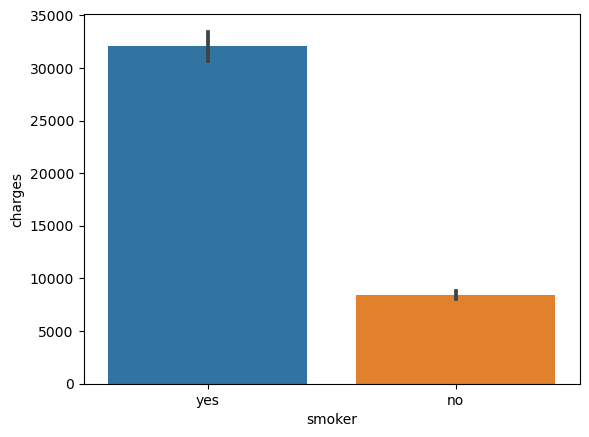

In [4]:
sns.barplot(data=medical_df, x='smoker',y='charges');

In [5]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
smoker_code = {'no':0, 'yes':1}
medical_df['smoker_code']=medical_df.smoker.map(smoker_code)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [7]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984767

In [8]:
enc = preprocessing.OneHotEncoder()


In [12]:
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [10]:
enc.fit(medical_df[['sex']])
enc.categories_

[array(['female', 'male'], dtype=object)]

In [13]:
enc.transform([['northeast'],['northwest']]).toarray()

C:\Users\taush\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [14]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [15]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [16]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [17]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [18]:
sex_code={'female':0,'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_code)

In [19]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0,0


In [20]:
model = LinearRegression()

In [21]:
inputs=medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']]
targets= medical_df['charges']

model.fit(inputs,targets)

predictions= model.predict(inputs)
print(predictions)

print('Loss',rmse(targets,predictions))


[25293.7130284   3448.60283431  6706.9884907  ...  4149.13248568
  1246.58493898 37085.62326757]
Loss 6041.6796511744515


In [23]:
non_smoker_df =medical_df[medical_df.smoker=='no']

In [24]:
inputs=non_smoker_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']]
targets= non_smoker_df['charges']

model.fit(inputs,targets)

predictions= model.predict(inputs)
print(predictions)

print('Loss',rmse(targets,predictions))

[2264.01132619 6069.12726666 5877.67545787 ... 3159.45809157 2260.98337791
 2442.18705738]
Loss 4573.074988795492


In [25]:
smoker_df =medical_df[medical_df.smoker=='yes']

In [27]:
inputs=smoker_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']]
targets= smoker_df['charges']

model.fit(inputs,targets)

predictions= model.predict(inputs)
print(predictions)

print('Loss',rmse(targets,predictions))

[23140.75355179 30806.65871977 44432.02632867 36613.11781244
 33702.13286862 38721.54092967 34916.54641141 37884.14578333
 40590.25734779 51422.75929701 36795.87114087 30837.65021784
 35476.96445533 46654.10726179 26971.40812205 23551.14519646
 15068.33340255 18466.48718554 19175.16493119 36623.03015756
 38500.77045113 22431.67868538 37858.56449829 37280.70361097
 40556.27917547 21351.88997791 15143.62282539 36443.69462151
 23133.38155955 43670.74299969 24599.70081338 35146.99407341
 23730.97180371 11773.99423191 21835.8971838  27154.13636703
 34095.9664088  23042.71627311 23915.60533586 18900.24921628
 35495.63833064 27119.01063262 34622.62757572 49366.89371886
 48932.86075099 35893.09691699 27596.37142414 32933.89674881
 22635.79905693 19283.76461015 24225.18580588 37952.26291211
 35106.34278659  7631.04502637 41616.86585605 40331.0964704
 37269.56801447 40847.63616899 28430.49085085 20569.96114436
 27278.61648696 35859.86309696 50385.53935769 15142.08598672
 40703.57844577 29699.485

NameError: name 'input_culs' is not defined